# Sentimen Analisis Member JKT48 

### pengertian sentimen analysis

sentimen analysis adalah proses penggunaan text analytics untuk mendapatkan berbagai sumber data dari internet dan beragam platform media sosial. <br>
dengan kata lain, merupakan metode untuk memperoleh data dari berbagai platform yang tersedia di internet <br>
Tujuannya adalah untuk memperoleh opini dari pengguna yang terdapat pada platform tersebut. <br>
Sentiment analysis berperan sebagai alat yang dapat menghubungkan seluruh data tersebut

Informasi berbentuk teks saat ini banyak terdapat di internet dalam format forum, blog, media sosial, serta situs berisi review. Dengan bantuan sentiment analysis, informasi yang tadinya tidak terstruktur dapat diubah menjadi data yang lebih terstruktur.

Data tersebut dapat menjelaskan opini masyarakat mengenai produk, merk, layanan, politik, atau topik lainnya. Perusahaan, pemerintah, maupun bidang lainnya kemudian memanfaatkan data-data tersebut untuk membuat analisis marketing, review produk, umpan-balik produk, dan layanan masyarakat.

Guna menghasilkan opini yang dibutuhkan, sentiment analysis tidak hanya harus bisa mengenali opini dari teks. Proses yang juga disebut sebagai opini mining ini juga perlu bekerja dengan mengenali tiga aspek berikut: 
<ul> 
    <li>Subjek: topik apa yang sedang dibicarakan.</li>
    <li>Polaritas: apakah opini yang diberikan bersifat positif atau negatif.</li>
    <li>Pemegang opini: seseorang yang mengeluarkan opini tersebut.</li>
</ul>

Sentiment analysis kemudian akan membedakan teks menjadi dua kategori, yakni 
<ul> 
    <li>Fakta merupakan ekspresi objetif mengenai sesuatu.</li>
    <li>Sementara opini adalah ekpresi subjektif yang menggambarkan sentimen, perasaan, maupun penghargaan terhadap suatu hal</li>
</ul>

sumber : <a href="https://www.ekrut.com/media/sentiment-analysis-adalah">Mengenal sentiment analysis dan perannya dalam data media sosial</a>

## Cara Kerja sentimen analysis

## Business Case

dalam kasus ini, saya ingin menerapkan pada kasus yang sekarang dihadapi di dunia nyata, dalam lingkup dunia peridolan, yaitu JKT48, yang kata Cindy Yuvia pada saat Speech SSK 2018 mengatakan bahwa JKT48 sedang dalam kondisi kritis, dan faktanya seperti yang baru saja terjadi yaitu Graduate Massal, yaitu dimana banyak member yang mengumumkan grad karena berbagai alasan, kemudian lingkungan fans yang ga karuan seperti komentar negatif

pada kasus ini, score pada sentimen analysis ini menandakan respon warga twitter positive atau negative, terhadap tweetnya member JKT48

pada tahap ini, saya akan melakukan analisis terhadap member JKT48 dari akun twitternya, dengan sentimen analysis

In [2]:
import tweepy as twt
from textblob import TextBlob as tb

**login twitter**

menggunakan aplikasi dari twitter developer

In [3]:
# masukan consumer key dan secret biar python bisa ngakses twitter apps nya
consumer_key = "AGUu52hLSOvJWGMaBUaz98Q7g"
consumer_secret = "i0QPIv3N5GIv8XIQ7zsfMHMX5Mkm1QhcgDVtoK7YEPnXPJZLD2"

# masukan token untuk mengakses twitter apps
access_token = "1050363426357174272-c5cOsw3rpck6g7dgJUcpsl7ZcUmYhI"
access_token_secret = "VFYWdsURMHDN4Mh2BKJUQPedEkPMXsMXu6D4QXPt27Y1y"

authentication <br>
berfungsi untuk authorize agar bisa menggunakan API Twitter dalam mengambil data
<br> <br>
terus menggunakan method OAuthHander untuk authourizasi consumer key dan secretnya <br>
abis itu tokennya di akses pake variabel auth nya <br>

In [4]:
auth = twt.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# authentication arguments
api = twt.API(auth)

mengambil tweet
<br> <br>
terus di sentiment analysis terus ditampilin tweetnya

In [5]:
member = ['@C_ArielJKT48','@A_YoriJKT48','@A_ZeeJKT48','@CindyH_JKT48','@CindyH_JKT48','@Diani_JKT48','@Eve_JKT48',
          '@F_FeniJKT48','@S_SiscaJKT48','@frieskaJKT48','@gabyJKT48','@Nadila_JKT48','@N_AurelJKT48','@R_AmelJKT48',
          '@Ayen_JKT48', '@Julie_JKT48', 
          '@N_TasyaJKT48', '@A_ChristyJKT48', '@R_AninJKT48', '@bebyJKT48', '@A_GitaJKT48',
          '@H_EliJKT48', '@R_IndyJKT48', '@M_DesyJKT48', '@A_MutheJKT48', '@AyaJKT48_', '@N_ShaniJKT48','@S_GraciaJKT48',
          '@Y_ChikaJKT48', 
          '@Elisabeth_JKT48', '@Fidly_JKT48','@G_BrielleJKT48', '@Gabryela_JKT48', '@Jinan_JKT48',
          '@Melati_JKT48', '@N_LalaJKT48', '@Pucchi_JKT48', '@S_NandaJKT48', '@Celine_JKT48', 
          '@H_AikoJKT48', '@A_AfiqahJKT48', '@F_MiraJKT48', '@C_NunuJKT48', '@C_OnielJKT48', '@M_DevythaJKT48', 
          '@A_DeyJKT48', '@K_ErichanJKT48', '@K_FebiJKT48', '@F_BriJKT48', '@F_OllaJKT48', '@A_FionyJKT48', '@S_FloraJKT48', 
          '@Freya_JKT48', '@G_VanyJKT48', '@C_JessiJKT48', '@C_JesslynJKT48', '@R_KeisyaJKT48', '@A_LuluJKT48',
          '@N_RatuJKT48', '@K_PamelaJKT48', '@A_RevaJKT48', '@R_AdelJKT48', '@A_AlmaJKT48', '@G_ShalzaJKT48', '@M_UmeJKT48',
          '@F_ViviJKT48', '@N_AraJKT48'
         ]

# diinisialisasi secara array
members = []
tweets = []
sentiments = []

for m in member:
    # memanggil search method untuk mencari keyword yang isinya sesuai argument
    public_tweets = api.search(m)

    for tweet in public_tweets:
        print(tweet.text)
        members.append(m)
        tweets.append(tweet.text)
        
        analysis = tb(tweet.text)
        print(analysis.sentiment)
        
        sentiments.append(analysis.polarity)

        print("")


@apriliyarizuki @C_ArielJKT48 Ajak siapa yaaaaaa
Sentiment(polarity=0.0, subjectivity=0.0)

@MASirdatama @C_ArielJKT48 Rame rame doong ajakin yang lain juga 🥰
Sentiment(polarity=0.0, subjectivity=0.0)

@apriliyarizuki @C_ArielJKT48 Tau gua, tapi jangan dong ntar w dipuks gimana
Sentiment(polarity=0.0, subjectivity=0.0)

@dum_pon @aldiynd @dikasyahada @C_ArielJKT48 @A_FionyJKT48 @S_GraciaJKT48 @Gabryela_JKT48 @Eve_JKT48 @gabyJKT48 @S_SiscaJKT48
Sentiment(polarity=0.0, subjectivity=0.0)

RT @C_ArielJKT48: Semangat yg sekolah, kuliah, kerja, bahkan d rmh punnnn, ada yg blm kesebut gaa ?? Wkwk 😄
Btw, jgn lupa juga dtg INY yaa…
Sentiment(polarity=0.0, subjectivity=0.0)

@MASirdatama @C_ArielJKT48 Hmm pacal w punya twitter nih. Mau di-ccin buat minta ijin? 🤔
Sentiment(polarity=0.0, subjectivity=0.0)

@apriliyarizuki @C_ArielJKT48 Gapapa, temenin aku kaprel. Kita nonton berdua aja
Sentiment(polarity=0.0, subjectivity=0.0)

@MASirdatama @C_ArielJKT48 Telat kamu. https://t.co/IrFsfGIyVl
Sentime

RT @bnuratmaja: ⛔️ JKT48 ON CRACK ⛔️

EPISODE_05.pdf 💕

featuring: @N_TasyaJKT48 @F_ViviJKT48 @A_ZeeJKT48 @Diani_JKT48 @A_FionyJKT48 @Melat…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Diani_JKT48: Aduh aku bingung pilih yang mana plis jangan rebutin aku 🤪 Gredi/ Shandi?? 🤷🏻‍♀️ Wkwkwkwk kabooorrrr💨 

@S_GraciaJKT48 @N_…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @bnuratmaja: ⛔️ JKT48 ON CRACK ⛔️

EPISODE_05.pdf 💕

featuring: @N_TasyaJKT48 @F_ViviJKT48 @A_ZeeJKT48 @Diani_JKT48 @A_FionyJKT48 @Melat…
Sentiment(polarity=0.0, subjectivity=0.0)

mayoretnya ini aja incess @Diani_JKT48 https://t.co/PMLm45rVcy
Sentiment(polarity=0.0, subjectivity=0.0)

@Diani_JKT48 kamu harus minum teh hangat penuh cinta buatan kak @toruguskey pasti langsung sembuh
Sentiment(polarity=0.0, subjectivity=0.0)

@rdhwnsyh @Diani_JKT48 Saya kurang perhatian wkwkwk
Sentiment(polarity=0.0, subjectivity=0.0)

@dhanidavega @Diani_JKT48 ga gelisah, ane khawatir. tapi kan ane liat liat dari kemaren lu kaga kenape nap

RT @masked1193: Berat ya nad? 😅😅😅

Nadila Cindi Wantari @Nadila_JKT48 at @_JKT48TeamJ Marching Band Performance

@ Car Free Day Sudirman, J…
Sentiment(polarity=0.4, subjectivity=0.8)

RT @masked1193: Berat ya nad? 😅😅😅

Nadila Cindi Wantari @Nadila_JKT48 at @_JKT48TeamJ Marching Band Performance

@ Car Free Day Sudirman, J…
Sentiment(polarity=0.4, subjectivity=0.8)

RT @jenengku_aslam: 20191117 Pawnas dan silau @Nadila_JKT48 at Marching Band CFD Team J https://t.co/fBGxeVcCxe
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Nadila_JKT48: Halo! JKT48 Akustik Video Cover terbaru https://t.co/2MzEdqXf7t
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Nadila_JKT48: Bare face betul ni, alias blm mandi hiii 🤢 btw have a mice day ! 🐭☺️ https://t.co/hoHoaoUc1Y
Sentiment(polarity=0.0625, subjectivity=0.1)

@Nadila_JKT48 Waduh jeru nad spechlees sih
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Nadila_JKT48: no one : 
really no one : 
literally no one : 

tukang ojeg saya : mba ngerasa jelek ga, so

@Julie_JKT48 Jumat masih lama ya
Sentiment(polarity=0.0, subjectivity=0.0)

@Julie_JKT48 https://t.co/PaAeuiTzxD
Sentiment(polarity=0.0, subjectivity=0.0)

@Julie_JKT48 nice
Sentiment(polarity=0.6, subjectivity=1.0)

RT @Julie_JKT48: Sunkissed🌞 https://t.co/uqx6rC2Sv9
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Julie_JKT48: Sunkissed🌞 https://t.co/uqx6rC2Sv9
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Julie_JKT48: Sunkissed🌞 https://t.co/uqx6rC2Sv9
Sentiment(polarity=0.0, subjectivity=0.0)

@Julie_JKT48 Coba aja tiap hari upload gini gamakan seminggu juga kuat
Sentiment(polarity=0.0, subjectivity=0.0)

RT @bnuratmaja: ⛔️ JKT48 ON CRACK ⛔️

EPISODE_05.pdf 💕

featuring: @N_TasyaJKT48 @F_ViviJKT48 @A_ZeeJKT48 @Diani_JKT48 @A_FionyJKT48 @Melat…
Sentiment(polarity=0.0, subjectivity=0.0)

@Julie_JKT48 Sunkist
Sentiment(polarity=0.0, subjectivity=0.0)

@Julie_JKT48 Jeruk Sunkist? https://t.co/vK1q9rsYZB
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Julie_JKT48: Sunkissed🌞 https://t.co/

@bnuratmaja @S_SiscaJKT48 @A_GitaJKT48 @Yona_JKT48 @S_GraciaJKT48 @frieskaJKT48 @Viny_JKT48 Mendaki gunung lewati l… https://t.co/rmmDCO8Yqx
Sentiment(polarity=0.0, subjectivity=0.0)

@bnuratmaja @S_SiscaJKT48 @A_GitaJKT48 @Yona_JKT48 @S_GraciaJKT48 @frieskaJKT48 @Viny_JKT48 Mantap inyi jadi ninja hatori 🤣
Sentiment(polarity=0.0, subjectivity=0.0)

@H_EliJKT48 Dulu pas masih SMA suka nya ngilangin, sedangkan pas kuliah sukanya ngerusakin hehehe
Sentiment(polarity=0.0, subjectivity=0.0)

@H_EliJKT48 Rusak xv
Sentiment(polarity=0.0, subjectivity=0.0)

@H_EliJKT48 Nyala sebelah li 🤣
Sentiment(polarity=0.0, subjectivity=0.0)

@H_EliJKT48 Kalau aku rusak el😁
Sentiment(polarity=0.0, subjectivity=0.0)

RT @deccembey: #WTS Tiket Handshake @H_EliJKT48 Sesi 5 Jakarta ada 10 Tiket, minat? Mention aja, ya! 

Yang lihat, tolong bantu RT guyssss.…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @H_EliJKT48: Tumben bgt eli biasanya earphone tuh seringnya rusak kalopun ilang plg lupa naro, nah ini lenya

@N_ShaniJKT48 Jleb😌
Sentiment(polarity=0.0, subjectivity=0.0)

@N_ShaniJKT48 Haduhhhhh
Sentiment(polarity=0.0, subjectivity=0.0)

RT @InshanityID: [INSTAGRAM] @N_ShaniJKT48
☺👋

Ambyaaarrrr 😳😍

#ThisIsSumini
#BRINGBACKSTORIA👑 https://t.co/3xW8KxETUq
Sentiment(polarity=-0.75, subjectivity=1.0)

RT @sinkajuliani96: @N_ShaniJKT48 Waduuw
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_ShaniJKT48: @novarowisnu Sudah paket kak, mohon maaf.
Sentiment(polarity=0.0, subjectivity=0.0)

@N_ShaniJKT48 Dua tiga sabun detol...
Sentiment(polarity=0.0, subjectivity=0.0)

@N_ShaniJKT48 Jalan-jalan ke kota Batu
Maaf saya sudah halu
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_ShaniJKT48: Lagi hujan berteduh sama Sumini
Aduh, kangen ni
Sentiment(polarity=0.0, subjectivity=0.0)

RT @fahmashadrina: @N_ShaniJKT48 @uty_bonita @sinkajuliani96 Nemu!!! https://t.co/Wfev11y37y
Sentiment(polarity=0.0, subjectivity=0.0)

@N_ShaniJKT48 Ikam tongkol ikan lele
Mantap le
Sentiment(polarity=0.0, subjectivity=0.0)



RT @K_FebiJKT48: #RandoMyBee

Waktu ultah @A_ChristyJKT48
Didalamnya ada percekcokan antara @G_BrielleJKT48 dan @Y_ChikaJKT48 😂😂😂😂😂😂 https:…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_BrielleJKT48: jangan lupa senyum, senyum kamu itu indah. https://t.co/Kb97sfC7tF
Sentiment(polarity=0.0, subjectivity=0.0)

@G_BrielleJKT48 Lagi ketiduran nih nungguin nasi Lum dtg juga
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_BrielleJKT48: jangan lupa senyum, senyum kamu itu indah. https://t.co/Kb97sfC7tF
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_BrielleJKT48: lagi mauu jaga makan ni , ada tips untuk diriku yg masih noob ini
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_BrielleJKT48: lagi mauu jaga makan ni , ada tips untuk diriku yg masih noob ini
Sentiment(polarity=0.0, subjectivity=0.0)

@G_BrielleJKT48 Jaga hati kamu aja, jangan sampe pindah dari hatiku ya.
Sentiment(polarity=0.0, subjectivity=0.0)

@G_BrielleJKT48 Semua berawal dari niat 👌🏻
Sentiment(polarity=0.0, subjectivit

@fitriadindaaa @Pucchi_JKT48 Pffftttt
Sentiment(polarity=0.0, subjectivity=0.0)

@fitriadindaaa @Pucchi_JKT48 Okee maap :(
Sentiment(polarity=-0.75, subjectivity=1.0)

@fitriadindaaa @Pucchi_JKT48 Ngaku aja ngakuuu 😄
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Pucchi_JKT48: Hari ini turnamen pubg~~~~~~ 👍🙂✨🌸
Sentiment(polarity=0.0, subjectivity=0.0)

@Pucchi_JKT48 Kacamata nya sama nih kaya nya, yeekan? @fitriadindaaa
Sentiment(polarity=0.0, subjectivity=0.0)

Gimana mbak puti harinya @Pucchi_JKT48
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Pucchi_JKT48: Hari ini turnamen pubg~~~~~~ 👍🙂✨🌸
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Pucchi_JKT48: Pucchi ngambek. Hibur dong! Malah poto-poto! 😡 https://t.co/9yjy8sYdl8
Sentiment(polarity=0.0, subjectivity=0.0)

@Pucchi_JKT48 Oalah
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Pucchi_JKT48: Dibilang jangan ganggu! Aku lagi war!! 😡😡 mati kan!! Huh😔 https://t.co/HECPs3P0z1
Sentiment(polarity=0.0, subjectivity=0.0)

@Pucchi_JKT48 pap 

@C_NunuJKT48 BINTE
Sentiment(polarity=0.0, subjectivity=0.0)

RT @C_NunuJKT48: Ada yang tau nggak ini makanan apa? Coba tebak https://t.co/cNsfMgxk9e
Sentiment(polarity=0.0, subjectivity=0.0)

RT @C_NunuJKT48: Ada yang tau nggak ini makanan apa? Coba tebak https://t.co/cNsfMgxk9e
Sentiment(polarity=0.0, subjectivity=0.0)

@C_NunuJKT48 suruh nebak mulu kayak pembawa acara kuis :(
Sentiment(polarity=-0.75, subjectivity=1.0)

@C_NunuJKT48 Makanan bayi, emang enak😛😛
Sentiment(polarity=0.0, subjectivity=0.0)

RT @C_NunuJKT48: Di rumah aku lagi hujan gede bngttttt tapi kalo cuaca kayak gini enaknya napain ya? hmmm🤔
Sentiment(polarity=0.0, subjectivity=0.0)

RT @C_NunuJKT48: Ada yang tau nggak ini makanan apa? Coba tebak https://t.co/cNsfMgxk9e
Sentiment(polarity=0.0, subjectivity=0.0)

@C_NunuJKT48 Nasi goreng
Sentiment(polarity=0.0, subjectivity=0.0)

RT @C_NunuJKT48: Ada yang tau nggak ini makanan apa? Coba tebak https://t.co/cNsfMgxk9e
Sentiment(polarity=0.0, subjectivity=0.0)

@C_NunuJKT

RT @F_BriJKT48: Jangan lupa magrib nya ❤
Sentiment(polarity=0.0, subjectivity=0.0)

RT @F_BriJKT48: Jangan lupa magrib nya ❤
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Udah beb kmu juga ya can
Sentiment(polarity=0.0, subjectivity=0.0)

RT @F_BriJKT48: Jangan lupa magrib nya ❤
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Kamu juga
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Kok kamu ingetin sihhh??? Harusnya aku yg ingetin tau huft 😒😡
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Siap briluv 💕💕💕
Sentiment(polarity=0.0, subjectivity=0.0)

RT @F_BriJKT48: Jangan lupa magrib nya ❤
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Siappp
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 lagi hujan, enaknya makan apa? Jawab ntar gw retweet syg
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Siap sayang 😘😘😘
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Iy iya 😊
Sentiment(polarity=0.0, subjectivity=0.0)

@F_BriJKT48 Ok. Makasi

RT @G_VanyJKT48: Vanvan n Tutu https://t.co/pcFb9BUVWn
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: Oke guys ini kl rambut ku di potong😊
Btw thanks to @G_VanyJKT48 sudah meminjamkan rambut nya wkwkwk,dan kalian haruss tauu…
Sentiment(polarity=0.2, subjectivity=0.2)

@A_ChristyJKT48 @G_VanyJKT48 u ngeracunin kiti ya?😒
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_VanyJKT48: Nerbener ya si astronot ini... 😔🤔 https://t.co/HVGLVSLetz
Sentiment(polarity=0.0, subjectivity=0.0)

RT @VoiceOfVany: Buat kalian yang ingin menggabungkan suara kalian untuk mendukung kak @G_VanyJKT48 bersama kami, 
Sung aja regist di sini…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_VanyJKT48: Selamat malam kamis.
Ft. Gombal aku, Ft. Ketawa temen aku yg kayanya cringe denger gombal aku hahahaha sorry ya🤣 https://t…
Sentiment(polarity=-0.15, subjectivity=0.75)

RT @G_VanyJKT48: Selamat malam kamis.
Ft. Gombal aku, Ft. Ketawa temen aku yg kayanya cringe denger gombal aku hahahaha sorry ya🤣 https

RT @N_RatuJKT48: ☺️ https://t.co/PesWdWxTxZ
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: ini foto wktu aku  kelas 1 smp WKWKWK https://t.co/XgB4H4JcZq
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: morning❤️ https://t.co/keYBT60qKq
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: hmmm https://t.co/gGnk0oYeB1
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: haii aku upin 👋🏼 https://t.co/KG6GWMfQwn
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: Helow! https://t.co/BRR92IzxMY
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: Wkwkwk sumpah serem bgt😂

.
.
Btw...
 Guud night 💕 https://t.co/6bzW8wpJvv
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: Gabut hehehe.... https://t.co/ppC88kelpL
Sentiment(polarity=0.0, subjectivity=0.0)

RT @N_RatuJKT48: Nutupin cahaya wkwkwk...btw kalian lg ngapain sih?...
Kl aku lg nemenin adek ku di rumah sakit... https://t.co/D55rjJLwUW
Sentiment(polarity=0.0, subjectivity=0.0)

@G_ShalzaJKT48 Kak Shalza lagi apa ? Jangan main becek becekan ya hujan wkwk
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)

Happy Birthday Buat AdekMu @G_ShalzaJKT48 🎈🎈🎂🎂🍭🍭

Koko Doakan Panjang Umur, Sehat Selalu dan Makin Dekat Dengan Kel… https://t.co/SCiadszdXS
Sentiment(polarity=0.8, subjectivity=1.0)

Happy Birthday Buat AdekMu @G_ShalzaJKT48 🎈🎈🎂🎂🍭🍭

Koko Doakan Panjang Umur, Sehat Selalu dan Makin Dekat Dengan Kel… https://t.co/QhLVHN9nPM
Sentiment(polarity=0.8, subjectivity=1.0)

@N_ShaniJKT48 @G_ShalzaJKT48 tolong coba
Sentiment(polarity=0.0, subjectivity=0.0)

@N_ShaniJKT48 Barang kali calza mau ikutan 🙂👍 @G_ShalzaJKT48
Sentiment(polarity=0.0, subjectivity=0.0)

@Freya_JKT48 @F_ViviJKT48 @G_ShalzaJKT48
Sentiment(polarity=0.0, subjectivity=0.0)

@G_ShalzaJKT48 bau kencur, soalnya bumbunya kencur
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_ShalzaJKT48: Kok pada wkwk sih
Sentiment(polarity=0.0, subjectivity=0.0)

RT @G_ShalzaJKT48: Lagi makan cokla

total member aktif

In [6]:
member

['@C_ArielJKT48',
 '@A_YoriJKT48',
 '@A_ZeeJKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@Diani_JKT48',
 '@Eve_JKT48',
 '@F_FeniJKT48',
 '@S_SiscaJKT48',
 '@frieskaJKT48',
 '@gabyJKT48',
 '@Nadila_JKT48',
 '@N_AurelJKT48',
 '@R_AmelJKT48',
 '@Ayen_JKT48',
 '@Julie_JKT48',
 '@N_TasyaJKT48',
 '@A_ChristyJKT48',
 '@R_AninJKT48',
 '@bebyJKT48',
 '@A_GitaJKT48',
 '@H_EliJKT48',
 '@R_IndyJKT48',
 '@M_DesyJKT48',
 '@A_MutheJKT48',
 '@AyaJKT48_',
 '@N_ShaniJKT48',
 '@S_GraciaJKT48',
 '@Y_ChikaJKT48',
 '@Elisabeth_JKT48',
 '@Fidly_JKT48',
 '@G_BrielleJKT48',
 '@Gabryela_JKT48',
 '@Jinan_JKT48',
 '@Melati_JKT48',
 '@N_LalaJKT48',
 '@Pucchi_JKT48',
 '@S_NandaJKT48',
 '@Celine_JKT48',
 '@H_AikoJKT48',
 '@A_AfiqahJKT48',
 '@F_MiraJKT48',
 '@C_NunuJKT48',
 '@C_OnielJKT48',
 '@M_DevythaJKT48',
 '@A_DeyJKT48',
 '@K_ErichanJKT48',
 '@K_FebiJKT48',
 '@F_BriJKT48',
 '@F_OllaJKT48',
 '@A_FionyJKT48',
 '@S_FloraJKT48',
 '@Freya_JKT48',
 '@G_VanyJKT48',
 '@C_JessiJKT48',
 '@C_JesslynJKT48',
 '@R_KeisyaJKT48

jumlah member

In [103]:
len(member)

67

menampilkan masing - masing tweet member

In [8]:
tweets

['@apriliyarizuki @C_ArielJKT48 Ajak siapa yaaaaaa',
 '@MASirdatama @C_ArielJKT48 Rame rame doong ajakin yang lain juga 🥰',
 '@apriliyarizuki @C_ArielJKT48 Tau gua, tapi jangan dong ntar w dipuks gimana',
 '@dum_pon @aldiynd @dikasyahada @C_ArielJKT48 @A_FionyJKT48 @S_GraciaJKT48 @Gabryela_JKT48 @Eve_JKT48 @gabyJKT48 @S_SiscaJKT48',
 'RT @C_ArielJKT48: Semangat yg sekolah, kuliah, kerja, bahkan d rmh punnnn, ada yg blm kesebut gaa ?? Wkwk 😄\nBtw, jgn lupa juga dtg INY yaa…',
 '@MASirdatama @C_ArielJKT48 Hmm pacal w punya twitter nih. Mau di-ccin buat minta ijin? 🤔',
 '@apriliyarizuki @C_ArielJKT48 Gapapa, temenin aku kaprel. Kita nonton berdua aja',
 '@MASirdatama @C_ArielJKT48 Telat kamu. https://t.co/IrFsfGIyVl',
 '@apriliyarizuki @C_ArielJKT48 Kaprel nonton yuk',
 'RT @C_ArielJKT48: PAGI !! Kalian ngapain aja hari ini ? Aku cuma 1 kelas lalu nti malem ada nobar film “SENIOR” nich hehehe 🥰\nBtw aku foto…',
 'RT @ariellice_ofc: Kita masih membuka subsidi tiket HS loh!\n\nDengan harga 

jumlah masing - masing score rata-rata sentimen

In [9]:
sentiments

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.0,
 -0.1,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.24722222222222223,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.24722222222222223,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 -0.1499999999999999,
 0.0,
 0.0,
 -0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.75,
 0.0,
 0.8,
 0.2,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0625,
 0.0,
 -0.1,
 -0.1,
 -0.1,
 -

In [10]:
members

['@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@C_ArielJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_YoriJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@A_ZeeJKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 '@CindyH_JKT48',
 

In [11]:
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}


In [63]:
rank = list(range(1,67))
rank = pd.DataFrame(rank, columns = ['Rank'])
rank

,Rank
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [52]:
# d = {'rank' : rank,'member': members, 'tweet': tweets, 'sentiment': sentiments}
d = {'member': members, 'tweet': tweets, 'sentiment': sentiments}
df_sentiment = pd.DataFrame(d)

karena jumlah diatas yang ditampilkan per tweetnya, maka digabungkan dan masing-masing score di rata-ratakan

In [53]:
df_1 = df_sentiment.groupby(by=['member']).mean()
df_1

,sentiment
member,
@A_AfiqahJKT48,0.000000
@A_AlmaJKT48,0.066667
@A_ChristyJKT48,0.000000
@A_DeyJKT48,0.033333
@A_FionyJKT48,0.012222
@A_GitaJKT48,0.000000
@A_LuluJKT48,-0.102222
@A_MutheJKT48,-0.016667
@A_RevaJKT48,0.000000


dari hasil sentimen teratas di urutkan secara descending, biar yang teratas nilainya paling besar

In [78]:
df_2 = df_1.sort_values(by=['sentiment'], ascending=False)
df_2 

,sentiment
member,
@N_AurelJKT48,0.200000
@R_KeisyaJKT48,0.133333
@Melati_JKT48,0.100000
@A_YoriJKT48,0.080000
@G_ShalzaJKT48,0.067778
@S_NandaJKT48,0.066667
@A_AlmaJKT48,0.066667
@Freya_JKT48,0.060000
@S_GraciaJKT48,0.053571


menampilkan 32 member teratas

In [96]:
df_3 = rank.join(df_2.reset_index()).head(32)
df_3

,Rank,member,sentiment
0,1,@N_AurelJKT48,0.200000
1,2,@R_KeisyaJKT48,0.133333
2,3,@Melati_JKT48,0.100000
3,4,@A_YoriJKT48,0.080000
4,5,@G_ShalzaJKT48,0.067778
5,6,@S_NandaJKT48,0.066667
6,7,@A_AlmaJKT48,0.066667
7,8,@Freya_JKT48,0.060000
8,9,@S_GraciaJKT48,0.053571
9,10,@R_AninJKT48,0.046825


menampilkan jumlah tweet permember

In [83]:
df_sentiment['member'].value_counts()

@CindyH_JKT48       30
@A_AlmaJKT48        15
@S_FloraJKT48       15
@A_AfiqahJKT48      15
@N_LalaJKT48        15
@A_FionyJKT48       15
@Freya_JKT48        15
@H_EliJKT48         15
@C_NunuJKT48        15
@A_LuluJKT48        15
@F_FeniJKT48        15
@Pucchi_JKT48       15
@C_JessiJKT48       15
@G_BrielleJKT48     15
@R_IndyJKT48        15
@N_AurelJKT48       15
@Fidly_JKT48        15
@N_ShaniJKT48       15
@Eve_JKT48          15
@M_DesyJKT48        15
@S_NandaJKT48       15
@G_VanyJKT48        15
@F_BriJKT48         15
@Julie_JKT48        15
@R_AdelJKT48        15
@G_ShalzaJKT48      15
@R_AmelJKT48        15
@N_AraJKT48         15
@K_PamelaJKT48      15
@C_JesslynJKT48     15
                    ..
@M_DevythaJKT48     15
@Y_ChikaJKT48       15
@K_ErichanJKT48     15
@Elisabeth_JKT48    15
@A_ZeeJKT48         15
@Ayen_JKT48         15
@F_ViviJKT48        15
@A_ChristyJKT48     15
@M_UmeJKT48         15
@C_ArielJKT48       15
@C_OnielJKT48       15
@A_MutheJKT48       15
@AyaJKT48_ 

scrappin tweeter, terus masukin ke data frame

visualisasi text berdasarkan akun member

In [20]:
!pip install wordcloud

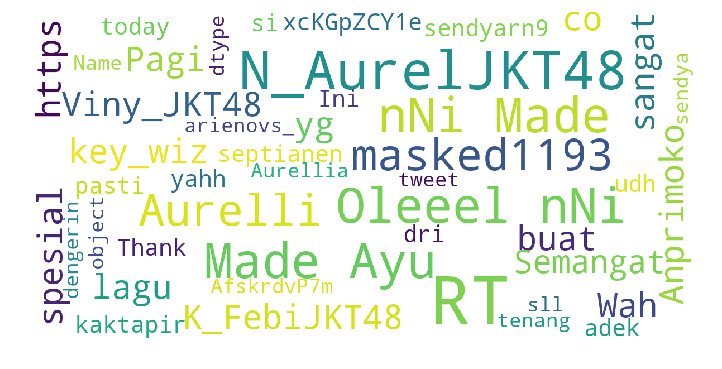

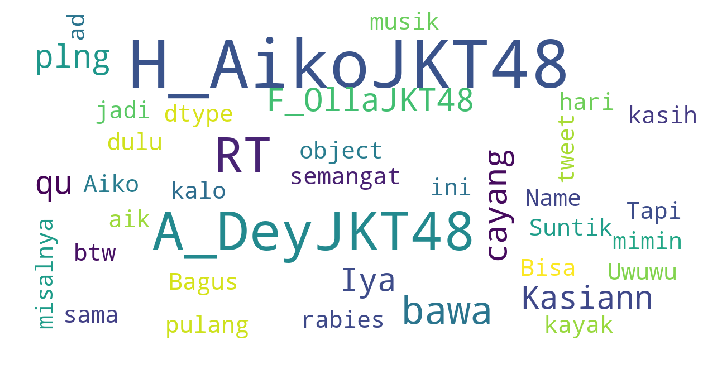

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_sentiment[df_sentiment['member']=='@N_AurelJKT48']['tweet'])
show_wordcloud(df_sentiment[df_sentiment['member']=='@H_AikoJKT48']['tweet'])

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

visualisasikan berdasarkan 10 teratas

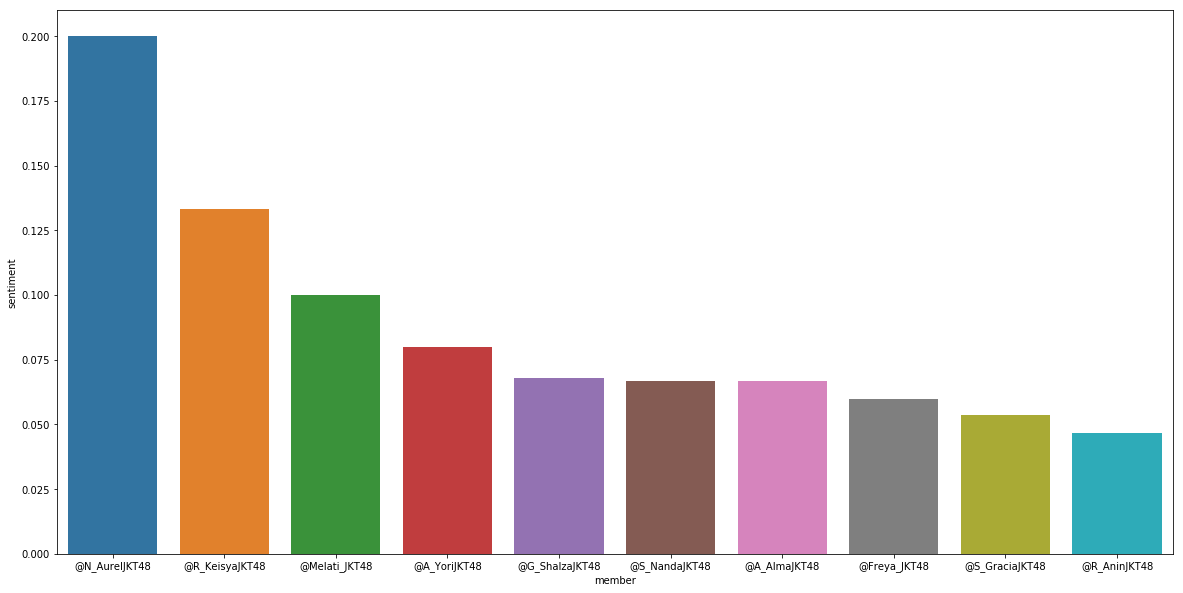

In [101]:
# color = ['blue','blue','blue','blue','blue','green','green','green','green','green']
plt.figure(figsize=(20,10))
sns.barplot(
#     palette = color,
    x = df_3["member"].head(10),
    y = df_3["sentiment"].head(10)
)

topik modelling <br>
biar bisa tau topik apa yang bisa naikin sentimennya para member